In [1]:
#Setup
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table
import numpy as np
import time
import datetime as dt
import scipy.stats as st

In [3]:
#setting up DataFrame
age_index = "../Resources/FRED Housing from Age 25-34.csv"
age = pd.read_csv(age_index)
age_df = pd.DataFrame(age)
age_df

,DATE,CXUHOUSINGLB0403M
0,2016-01-01,18587
1,2017-01-01,19927
2,2018-01-01,19627
3,2019-01-01,20499
4,2020-01-01,21223
5,2021-01-01,22641


In [4]:
#Checking Data Types
display(age_df.dtypes)

DATE                 object
CXUHOUSINGLB0403M     int64
dtype: object

In [5]:
#Changing the Date Column to Date-Time Data Type
age_df['DATE'] = pd.to_datetime(age_df['DATE'])
display(age_df.dtypes)

DATE                 datetime64[ns]
CXUHOUSINGLB0403M             int64
dtype: object

In [6]:
#dropping Data outside of parameters
clean_df = age_df.drop([0])
clean_df

,DATE,CXUHOUSINGLB0403M
1,2017-01-01,19927
2,2018-01-01,19627
3,2019-01-01,20499
4,2020-01-01,21223
5,2021-01-01,22641


In [16]:
#Getting Statistics
home_buyers = clean_df['CXUHOUSINGLB0403M']
mean_numpy = np.mean(home_buyers)
print(f"The Average number of Homes bought ages 25-34 from our cleaned data is {mean_numpy}")

median_numpy = np.median(home_buyers)
print(f"The Median number of Homes bought ages 25-34 from our cleaned data is {median_numpy}")

min_homes = clean_df['CXUHOUSINGLB0403M'].min()
print(f"The Lowest Number of Homes bought by 25-34 year olds in our dataset is {min_homes}")

max_homes = clean_df['CXUHOUSINGLB0403M'].max()
print(f"The Highest Number of Homes bought by 25-34 year olds in our dataset is {max_homes}")

The Average number of Homes bought ages 25-34 from our cleaned data is 20783.4
The Median number of Homes bought ages 25-34 from our cleaned data is 20499.0
The Lowest Number of Homes bought by 25-34 year olds in our dataset is 19627
The Highest Number of Homes bought by 25-34 year olds in our dataset is 22641


In [18]:
#creating a DataFrame of our Statistics
stats_df = pd.DataFrame(
    {"Statistic" : ["Mean", "Median", "Min", "Max"],
    "Homes Bought" : [mean_numpy, median_numpy, min_homes, max_homes]}
)
stats_df

,Statistic,Homes Bought
0,Mean,20783.4
1,Median,20499.0
2,Min,19627.0
3,Max,22641.0


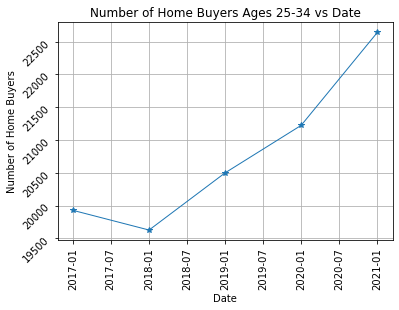

In [12]:
#Plotting our Findings
x = clean_df['DATE']
y = clean_df['CXUHOUSINGLB0403M']

plt.plot(x, y, marker='*', linewidth=1)

plt.xticks(rotation = 90)
plt.yticks(rotation = 45)

#Formatting Scatter Plot
plt.title("Number of Home Buyers Ages 25-34 vs Date")
plt.ylabel("Number of Home Buyers")
plt.xlabel("Date")
plt.grid()

plt.savefig("../Images/HomeBuyersvsDate.png")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

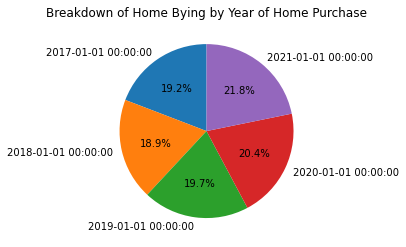

In [11]:
#Looking at Data in as a Pie Chart
plt.pie(clean_df['CXUHOUSINGLB0403M'], labels=clean_df['DATE'], autopct="%1.1f%%", startangle=90)
plt.title("Breakdown of Home Bying by Year of Home Purchase")
plt.savefig("../Images/BreakdownofHomeBuying.png")
plt.show